1) Фреймворк - Pytorch (torchvision.models.detection)

2)Запуск детектора на случайных картинках


In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision as tv
from PIL import Image
import cv2
from pathlib import Path

In [0]:
model = tv.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [0]:
!wget https://thumbs.dreamstime.com/z/%D1%81%D0%B2%D0%B5%D0%B6%D0%B8%D0%B5-%D1%8F%D0%B1%D0%BB%D0%BE%D0%BA%D0%B8-%D0%B0%D0%BF%D0%B5%D0%BB%D1%8C%D1%81%D0%B8%D0%BD%D1%8B-%D0%B8-%D0%B1%D0%B0%D0%BD%D0%B0%D0%BD%D1%8B-%D0%BD%D0%B0-%D0%B1%D0%B5%D0%BB%D0%B8%D0%B7%D0%BD%D0%B5-116874783.jpg
pilimg = Image.open("/content/свежие-яблоки-апельсины-и-бананы-на-белизне-116874783.jpg").convert("RGB")
plt.figure(figsize=(10,5))
plt.imshow(pilimg);
pilimg

In [8]:
model.eval()
img = tv.transforms.ToTensor()(pilimg).unsqueeze(0)
predict = model(img)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


In [0]:
def plot_preds(pilimg, predict):
    numimg = np.array(pilimg)
    boxes = predict[0]['boxes'][predict[0]['scores']>0.9].detach().numpy()
    labels = predict[0]['labels'][predict[0]['scores']>0.9].detach().numpy()
    # Переведем метки в названия
    COCO = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
    # Отрисовка
    counter=0
    for i in boxes:
        final = cv2.rectangle(numimg, (i[0],i[1]), (i[2],i[3]), color=(128, 0, 128), thickness=3)
        cv2.putText(numimg, str(COCO[labels[counter]]), (i[0],i[1]), cv2.FONT_HERSHEY_SIMPLEX, 1.6, (0,0,0), 2)
        counter+=1
    plt.figure(figsize=(10,5))
    return plt.imshow(final)

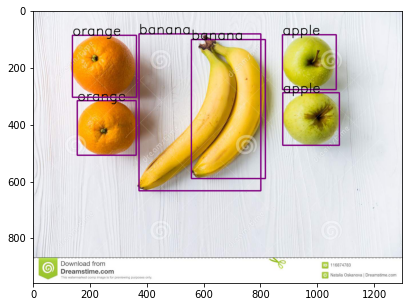

In [10]:
plot_preds(pilimg, predict)

В данном проекте попытаюсь выполнить оба сценария.
Датасет: https://www.kaggle.com/mbkinaci/fruit-images-for-object-detection
Детекция фруктов

In [14]:
#Разархивируем датасет с каггла
!unzip 34662_46346_bundle_archive.zip > /dev/null

replace test_zip/test/apple_77.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [0]:
class FrutDetector(torch.utils.data.Dataset):
    def __init__(self, path):
        self.path = Path(path)
        self.train_path = self.path/'train_zip'/'train'
        self.img_lst = list(sorted(self.train_path.glob("*.jpg")))
        self.xml_lst = list(sorted(self.train_path.glob("*.xml")))
    def __getitem__(self, ):
        
        return X, TARGET

    def __len__(self):
        return len(self.img_lst)

In [0]:
p = Path('/content')
train_path = p/'train_zip'/'train'
img_lst = list(sorted(train_path.glob("*.jpg")))
xml_lst = list(sorted(train_path.glob("*.xml")))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


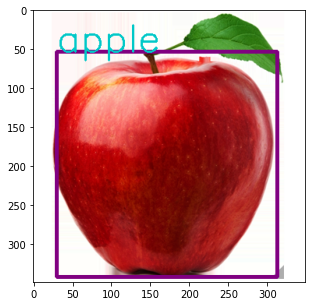

In [49]:
predd_img = Image.open("/content/train_zip/train/apple_1.jpg")
pred_img = Image.open("/content/train_zip/train/apple_1.jpg").convert('RGB')
tens_img = tv.transforms.ToTensor()(pred_img).unsqueeze(0)
pred = model(tens_img)
plot_preds(pred_img, pred)

In [55]:

for i in img_lst:
    pil = Image.open(i).convert("RGB")
    img = tv.transforms.ToTensor()(pil).unsqueeze(0)
    print (img.shape)

torch.Size([1, 3, 349, 349])
torch.Size([1, 3, 1500, 1500])
torch.Size([1, 3, 436, 652])
torch.Size([1, 3, 428, 450])
torch.Size([1, 3, 800, 800])
torch.Size([1, 3, 640, 960])
torch.Size([1, 3, 1046, 1400])
torch.Size([1, 3, 300, 333])
torch.Size([1, 3, 800, 700])
torch.Size([1, 3, 458, 610])
torch.Size([1, 3, 1200, 1600])
torch.Size([1, 3, 250, 250])
torch.Size([1, 3, 500, 500])
torch.Size([1, 3, 426, 640])
torch.Size([1, 3, 693, 693])
torch.Size([1, 3, 500, 500])
torch.Size([1, 3, 1696, 1132])
torch.Size([1, 3, 241, 350])
torch.Size([1, 3, 241, 350])
torch.Size([1, 3, 350, 700])
torch.Size([1, 3, 300, 300])
torch.Size([1, 3, 250, 250])
torch.Size([1, 3, 708, 1000])
torch.Size([1, 3, 800, 800])
torch.Size([1, 3, 439, 780])
torch.Size([1, 3, 947, 1320])
torch.Size([1, 3, 797, 800])
torch.Size([1, 3, 450, 298])
torch.Size([1, 3, 171, 166])
torch.Size([1, 3, 352, 389])
torch.Size([1, 3, 1390, 1300])
torch.Size([1, 3, 768, 1366])
torch.Size([1, 3, 240, 351])
torch.Size([1, 3, 387, 620])
t

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


torch.Size([1, 3, 450, 468])
torch.Size([1, 3, 261, 300])
torch.Size([1, 3, 936, 1023])
torch.Size([1, 3, 232, 350])
torch.Size([1, 3, 900, 1200])
torch.Size([1, 3, 533, 800])
torch.Size([1, 3, 810, 720])
torch.Size([1, 3, 1135, 1600])
torch.Size([1, 3, 587, 950])
torch.Size([1, 3, 645, 645])
torch.Size([1, 3, 500, 500])
torch.Size([1, 3, 340, 490])
torch.Size([1, 3, 720, 1280])
torch.Size([1, 3, 640, 640])
torch.Size([1, 3, 600, 800])
torch.Size([1, 3, 600, 800])
torch.Size([1, 3, 476, 634])
torch.Size([1, 3, 1010, 1010])
torch.Size([1, 3, 500, 500])
torch.Size([1, 3, 1332, 1300])
torch.Size([1, 3, 250, 196])
torch.Size([1, 3, 368, 654])
torch.Size([1, 3, 250, 250])
torch.Size([1, 3, 220, 220])
torch.Size([1, 3, 500, 500])
torch.Size([1, 3, 290, 290])
torch.Size([1, 3, 353, 450])
torch.Size([1, 3, 168, 238])
torch.Size([1, 3, 525, 700])
torch.Size([1, 3, 406, 722])
torch.Size([1, 3, 480, 720])
torch.Size([1, 3, 300, 300])
torch.Size([1, 3, 620, 640])
torch.Size([1, 3, 2850, 2850])
tor